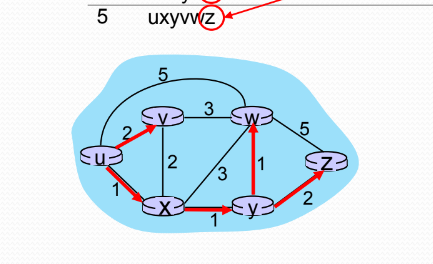

In [2]:
import heapq as hq
import pandas as pd

# Helper function to create adjacency list
def get_adj(edges, n):
    print(edges)
    adj = [[] for __ in range(n)]
    for u, v, w in edges:
        adj[u].append((v, w))
        adj[v].append((u, w))
    return adj

# Vertex label mapping
vertices = {i: chr(i + 97) for i in range(26)}

# Modified Dijkstra function
def dijkstra(adj, n, start):
    # Initialize distance and predecessor arrays
    dist = [0 if i == start else float('inf') for i in range(n)]
    pred = [None] * n  # Track predecessors
    pq = [(dist[start], start)]  # Priority queue

    # Create DataFrame with columns for steps, distances, and predecessors
    df = pd.DataFrame({'N': ['']})  # Step tracking
    for i in range(n):
        df[f'D({vertices[i]})'] = [dist[i]]  # Distance columns
        df[f'p({vertices[i]})'] = ['-']  # Predecessor columns

    step = 1  # Track the current step
    while pq:
        d, u = hq.heappop(pq)  # Get the closest vertex
        for v, w in adj[u]:  # Explore neighbors
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w  # Update distance
                pred[v] = u  # Track predecessor
                hq.heappush(pq, (dist[v], v))  # Add to priority queue

        # Update DataFrame with current state
        row = [df.iloc[step - 1, 0] + vertices[u]]  # Update step tracking
        row += [dist[i] for i in range(n)]  # Add distances
        row += [vertices[pred[i]] if pred[i] is not None else '-' for i in range(n)]  # Add predecessors
        df.loc[step] = row  # Add row to DataFrame
        step += 1

    display(df[1:])  # Display the DataFrame after all steps
    return dist

# Test data
u, v, w, z, y, x = 0, 1, 2, 3, 4, 5
edges = [
    (u, v, 2), (u, w, 5), (u, x, 1), (v, x, 2),
    (v, w, 3), (x, w, 3), (x, y, 1), (y, w, 1),
    (w, y, 1), (w, z, 5), (y, z, 2)
]

# Build adjacency list and run Dijkstra's algorithm
adj = get_adj(edges, 6)
dijkstra(adj, 6, 0)


[(0, 1, 2), (0, 2, 5), (0, 5, 1), (1, 5, 2), (1, 2, 3), (5, 2, 3), (5, 4, 1), (4, 2, 1), (2, 4, 1), (2, 3, 5), (4, 3, 2)]


,N,D(a),p(a),D(b),p(b),D(c),p(c),D(d),p(d),D(e),p(e),D(f),p(f)
1,a,0,2,5.0,inf,inf,1,-,a,a,-,-,a
2,af,0,2,4.0,inf,2.0,1,-,a,f,-,f,a
3,afb,0,2,4.0,inf,2.0,1,-,a,f,-,f,a
4,afbe,0,2,3.0,4,2.0,1,-,a,e,e,f,a
5,afbec,0,2,3.0,4,2.0,1,-,a,e,e,f,a
6,afbecc,0,2,3.0,4,2.0,1,-,a,e,e,f,a
7,afbeccd,0,2,3.0,4,2.0,1,-,a,e,e,f,a
8,afbeccdc,0,2,3.0,4,2.0,1,-,a,e,e,f,a


[0, 2, 3, 4, 2, 1]

In [3]:
print(', '.join([chr(i + 97) for i in range(26)]) + ' = ' + ', '.join([str(i) for i in range(26)]))

a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25


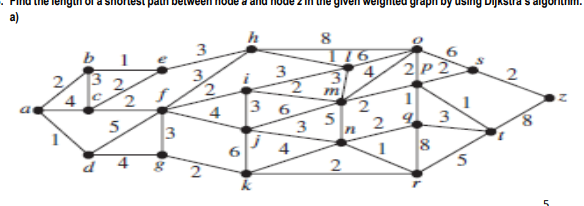


In [12]:
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, z = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20
vertices = { 0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'z' }

def get_adj(edges, n):
    adj = [[] for __ in range(n)]
    for u, v, w in edges:
        adj[u].append((v, w))
        adj[v].append((u, w))
    return adj

def dijkstra(adj, n, start):
    visited = set()
    dist = [0 if i == start else float('inf') for i in range(n)]
    pred = [None] * n
    pq = [(dist[start], start)]

    df = pd.DataFrame({'N': ['']})
    for i in range(n):
        df[f'{vertices[i]}'] = [f'{dist[i]}, -']

    step = 1
    while pq:
        d, u = hq.heappop(pq)
        if u in visited:
            continue
        visited.add(u)
        for v, w in adj[u]:
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                pred[v] = u
                hq.heappush(pq, (dist[v], v))

        row = [df.iloc[step - 1, 0] + vertices[u]]

        for i in range(n):
            if i not in visited:
                row.append(f'{dist[i]}, {vertices[pred[i]]}' if pred[i] is not None else f'{dist[i]}, -')
            else:
                row.append(f'-')

        df.loc[step] = row
        step += 1

    return df[1:]

edges = [
    # (a, b, 4), (a, c, 3),
    # (b, c, 2), (b, d, 5),
    # (c, d, 3), (c, e, 6),
    # (d, e, 1), (d, f, 5),
    # (e, g, 5),
    # (f, g, 2), (f, h, 7),
    # (g, h, 4)
    (a, b, 2), (a, c, 4), (a, d, 1),
    (b, c, 3), (b, e, 1), 
    (c, e, 2), (c, f, 2),
    (d, f, 5), (d, g, 4),
    (e, h, 3),
    (f, h, 3), (f, g, 3), (f, i, 2), (f, j, 4),
    (g, k, 2),
    (h, o, 8), (h, l, 1),
    (i, l, 3), (i, m, 2), (i, j, 3),
    (j, m, 6), (j, n, 3), (j, k, 6),
    (k, n, 4), (k, r, 2),
    (l, o, 6), (l, m, 3),
    (m, o, 4), (m, p, 2), (m, n, 5),
    (n, q, 2), (n, r, 1),
    (o, s, 6), (o, p, 2),
    (p, s, 2), (p, t, 1), (p, q, 1),
    (q, t, 3), (q, r, 8),
    (r, t, 5),
    (s, z, 2),
    (t, z, 8)
]
n = 21
adj = get_adj(edges, n)
df = dijkstra(adj, n, 0)
df.to_excel('pain.xlsx')
df

,N,a,b,c,d,e,f,g,h,i,...,l,m,n,o,p,q,r,s,t,z
1,a,-,"2, a","4, a","1, a","inf, -","inf, -","inf, -","inf, -","inf, -",...,"inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -"
2,ad,-,"2, a","4, a",-,"inf, -","6, d","5, d","inf, -","inf, -",...,"inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -"
3,adb,-,-,"4, a",-,"3, b","6, d","5, d","inf, -","inf, -",...,"inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -"
4,adbe,-,-,"4, a",-,-,"6, d","5, d","6, e","inf, -",...,"inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -"
5,adbec,-,-,-,-,-,"6, d","5, d","6, e","inf, -",...,"inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -"
6,adbecg,-,-,-,-,-,"6, d",-,"6, e","inf, -",...,"inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -"
7,adbecgf,-,-,-,-,-,-,-,"6, e","8, f",...,"inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -"
8,adbecgfh,-,-,-,-,-,-,-,-,"8, f",...,"7, h","inf, -","inf, -","14, h","inf, -","inf, -","inf, -","inf, -","inf, -","inf, -"
9,adbecgfhk,-,-,-,-,-,-,-,-,"8, f",...,"7, h","inf, -","11, k","14, h","inf, -","inf, -","9, k","inf, -","inf, -","inf, -"
10,adbecgfhkl,-,-,-,-,-,-,-,-,"8, f",...,-,"10, l","11, k","13, l","inf, -","inf, -","9, k","inf, -","inf, -","inf, -"
